# PART 1 - CAPP 30254 DIAGNOSTIC

# Graffiti Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
sns.set(color_codes=True)

In [2]:
graffiti = pd.read_csv("311_Service_Requests_-_Graffiti_Removal.csv")

In [3]:
graffiti.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,SSA,Latitude,Longitude,Location
0,01/01/2016,Completed,01/04/2016,16-00001120,Graffiti Removal,Brick - Unpainted,Front,4002 W BELDEN AVE,60639.0,1.149326e+06,1.914986e+06,35.0,25.0,20.0,NaN,41.922754,-87.726920,"(41.92275371369149, -87.72691963120627)"
1,01/01/2016,Completed,01/04/2016,16-00001753,Graffiti Removal,Brick - Unpainted,Alley,3324 W SCHUBERT AVE,60647.0,1.153530e+06,1.917756e+06,35.0,14.0,22.0,NaN,41.930270,-87.711830,"(41.93027022573564, -87.7118303754877)"
2,01/01/2016,Completed,01/04/2016,16-00002928,Graffiti Removal,Brick - Unpainted,Side,3700 S ARCHER AVE,60632.0,1.161132e+06,1.879956e+06,12.0,9.0,59.0,NaN,41.826349,-87.684472,"(41.82634906722627, -87.68447240074919)"
3,01/01/2016,Completed,01/04/2016,16-00003519,Graffiti Removal,Metal - Painted,Front,1503 W MORSE AVE,60626.0,1.165094e+06,1.946162e+06,49.0,24.0,1.0,24.0,42.007761,-87.668046,"(42.00776133839233, -87.66804558302428)"
4,01/01/2016,Completed,01/04/2016,16-00003521,Graffiti Removal,Metal - Painted,Front,1447 W MORSE AVE,60626.0,1.165368e+06,1.946171e+06,49.0,24.0,1.0,24.0,42.007765,-87.667774,"(42.00776549837537, -87.66777445467486)"


In [4]:
graffiti["Type of Service Request"].value_counts()

Graffiti Removal    120461
Name: Type of Service Request, dtype: int64

In [5]:
graffiti.shape

(120461, 18)

In [6]:
sum(pd.isnull(graffiti["SSA"]))

87550

In [7]:
sum(pd.isnull(graffiti["SSA"]))/graffiti.shape[0]

0.72679124363902015

We can see that the 'type of service request' is identical for the entire dataframe. As such, we will drop the service request number column as it doesnt tell us anything interesting. We will also drop the street address column as our anaysis will be focused on Zip Codes. Since we will not be perfoming any form of geociding, I will also drop the columns correspinding the the X and Y co-ordinates as well as the latiude and the longitude and the location.

From the above we can see that around 73% of data is not reported in the SSA column - thus the SSA column will also be dropped.

I am also dropping the service request number as these are just a form of ID number and dont tell us anything interesting.

In [8]:
graffiti.drop('Service Request Number', axis=1, inplace=True)
graffiti.drop("Street Address", axis=1, inplace=True)
graffiti.drop("X Coordinate", axis=1, inplace=True)
graffiti.drop("Y Coordinate", axis=1, inplace=True)
graffiti.drop("Latitude", axis=1, inplace=True)
graffiti.drop("Longitude", axis=1, inplace=True)
graffiti.drop("SSA", axis=1, inplace=True)
graffiti.drop("Location", axis=1, inplace=True)

In [9]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0


In [10]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%m/%d/%Y")
    d2 = datetime.strptime(d2, "%m/%d/%Y")
    return abs((d2 - d1).days)
#obtained from stack overflow

In [11]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0


In [12]:
a = list(graffiti['Creation Date'])
b = list(graffiti["Completion Date"])

combined = list(zip(a,b))

days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)
# we are ensuring is is of type str as we have some nan which are of type float.

df_days = pd.DataFrame({"Response Time (Days)": days_list})
graffiti = pd.concat([graffiti,df_days], axis=1)

month_list = []

for i in graffiti["Creation Date"]:
    clean = datetime.strptime(i, "%m/%d/%Y")
    month_list.append(clean.month)

df_months = pd.DataFrame({"Month": month_list})
graffiti = pd.concat([graffiti,df_months], axis=1)

In [13]:
len(days_list)

120461

In [14]:
graffiti.shape

(120461, 12)

In [15]:
sum(pd.isnull(graffiti["Completion Date"]))

0

All graffiti requests within the alst year have been completed. Seems like Chicago has a good handle on dealing with graffiti!

In [16]:
graffiti.head()

,Creation Date,Status,Completion Date,Type of Service Request,What Type of Surface is the Graffiti on?,Where is the Graffiti located?,ZIP Code,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Front,60639.0,35.0,25.0,20.0,3,1
1,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Alley,60647.0,35.0,14.0,22.0,3,1
2,01/01/2016,Completed,01/04/2016,Graffiti Removal,Brick - Unpainted,Side,60632.0,12.0,9.0,59.0,3,1
3,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1
4,01/01/2016,Completed,01/04/2016,Graffiti Removal,Metal - Painted,Front,60626.0,49.0,24.0,1.0,3,1


In [17]:
graffiti = graffiti.drop(graffiti.index[graffiti["ZIP Code"] == 0.0])
graffiti = graffiti.drop(graffiti.index[graffiti["Police District"] == 0.0])
graffiti = graffiti.drop(graffiti.index[graffiti["Ward"] == 0.0])

I am assuming that any Zip code, police district or ward encoded as 0.0 represents a missing value or human data entry. As such, these are dropped from out dataframe.

In [18]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()

,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,645.0,0.773643,1.122160,0.0,0.0,0.0,1.0,5.0
60602.0,133.0,0.571429,0.955730,0.0,0.0,0.0,1.0,5.0
60603.0,110.0,0.472727,0.864266,0.0,0.0,0.0,1.0,4.0
60604.0,76.0,0.381579,0.848011,0.0,0.0,0.0,0.0,5.0
60605.0,734.0,0.717984,1.168377,0.0,0.0,0.0,1.0,8.0
60606.0,337.0,0.575668,0.976389,0.0,0.0,0.0,1.0,6.0
60607.0,1009.0,0.596630,1.074058,0.0,0.0,0.0,1.0,10.0
60608.0,8537.0,0.544922,0.927366,0.0,0.0,0.0,1.0,7.0
60609.0,5199.0,0.495288,0.894560,0.0,0.0,0.0,1.0,8.0


In [19]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmax()

60649.0

In [20]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].max()

1.1511627906976745

In [21]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].idxmin()

60666.0

In [22]:
graffiti['Response Time (Days)'].groupby(graffiti['ZIP Code']).describe().unstack()['mean'].min()

0.0

Here we can see that the Zip code 60649 had the highest mean response days at around 1 Day. The area corresponding to the Zip Code 60666 had the smallest mean response time of around 0 days - this can be interpreted as same day service.

In [23]:
g = geocoder.google("60666")
g2 = geocoder.google(g.latlng, method='reverse')
g2.address

"Chicago O'hare International Rd, Chicago, IL 60666, USA"

We can see here that the Zip Code corresponding to same day service is actually Chicago O'Hare International Airport. Makes sense that the city woud want to ensure that this location is always looking good!

In [24]:
g3 = geocoder.google("60649")
g4 = geocoder.google(g3.latlng, method='reverse')
g4.neighborhood

'South Side'

The 60649 zip code corresponds to the South Shore and Jackson Park in the South Side of Chicago. I obtained this by typing in the Zip Code to google maps.

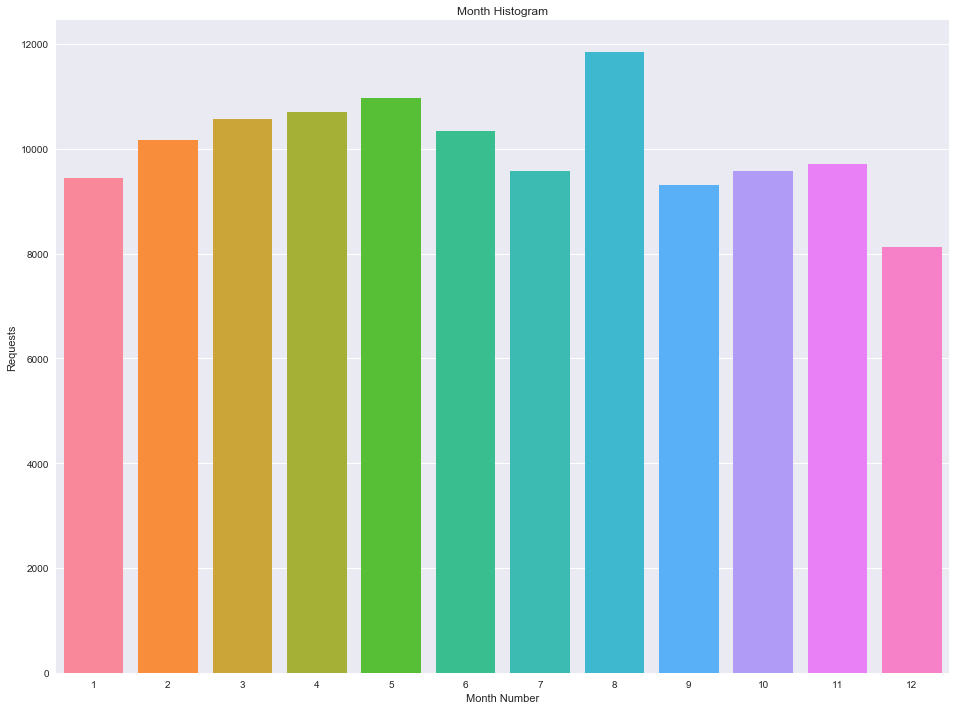

In [25]:
hist_month = graffiti["Month"].value_counts(sort=False)
plt.figure(figsize=(16,12))
g=sns.countplot(x="Month", saturation=1, data=graffiti, order=hist_month.index)
plt.title("Month Histogram")
plt.xlabel("Month Number")
plt.ylabel("Requests")
plt.show()

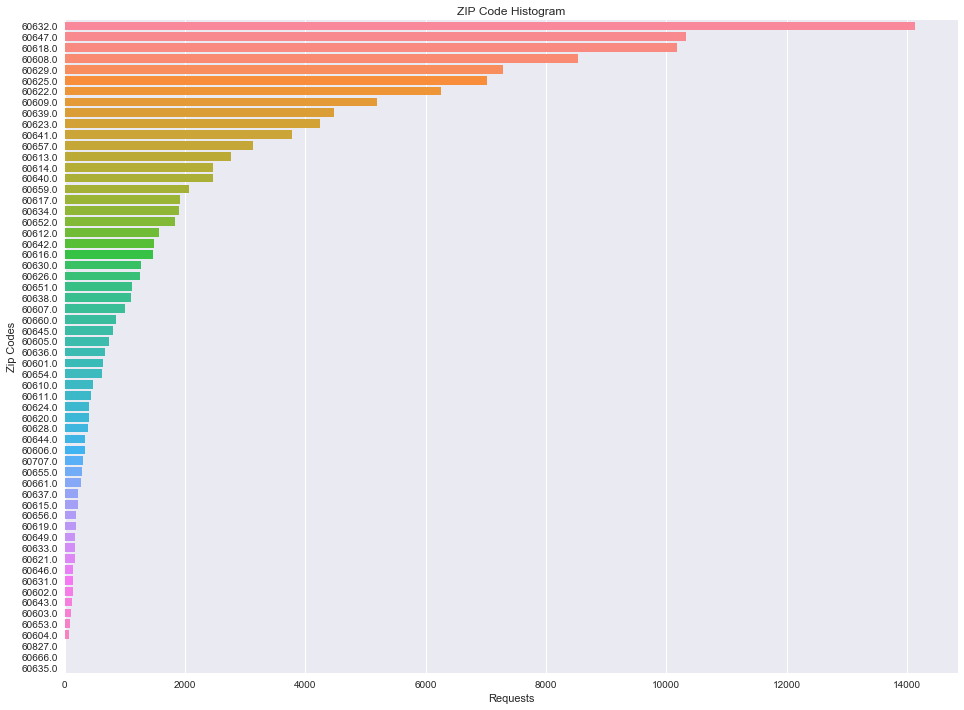

In [26]:
hist_graffiti = graffiti["ZIP Code"].value_counts()

plt.figure(figsize=(16,12))
g=sns.countplot(y='ZIP Code', saturation=1, data=graffiti, order=hist_graffiti.index)
plt.title("ZIP Code Histogram")
plt.xlabel("Requests")
plt.ylabel("Zip Codes")
plt.show()

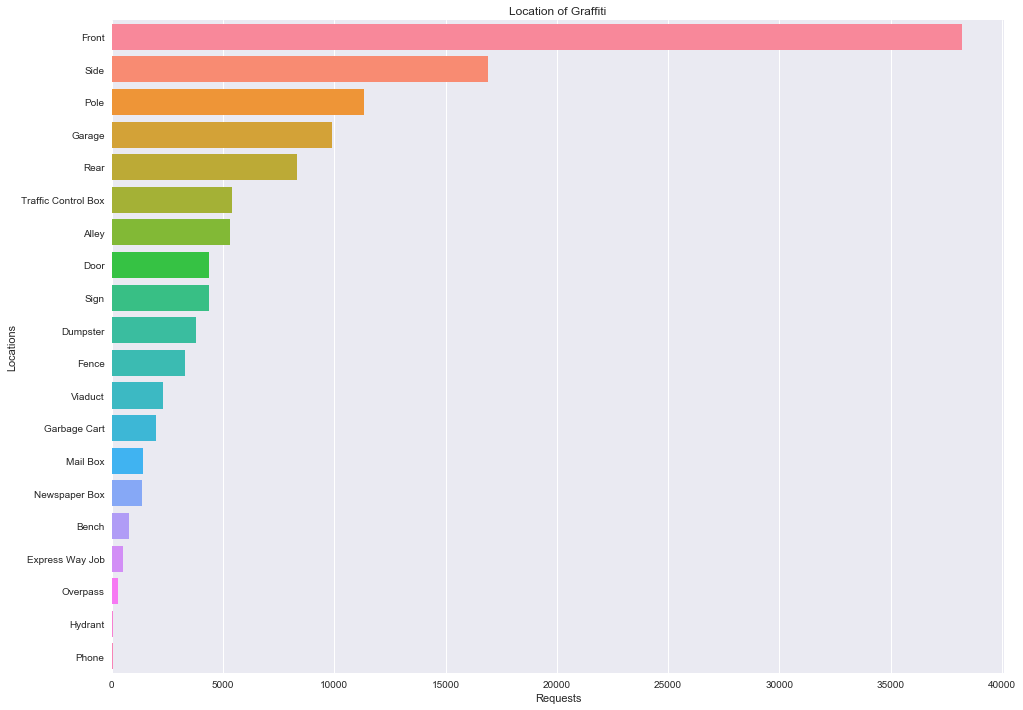

In [27]:
hist_location = graffiti["Where is the Graffiti located?"].value_counts()
plt.figure(figsize=(16,12))
g=sns.countplot(y='Where is the Graffiti located?', saturation=1, data=graffiti, order=hist_location.index)
plt.title("Location of Graffiti")
plt.xlabel("Requests")
plt.ylabel("Locations")
plt.show()

In [28]:
graffiti['Response Time (Days)'].groupby([graffiti["ZIP Code"], graffiti['Where is the Graffiti located?']]).describe().unstack()

count      mean       std  min   25%  \
ZIP Code Where is the Graffiti located?                                         
60601.0  Alley                            11.0  1.090909  1.136182  0.0  0.00   
         Bench                             7.0  0.285714  0.755929  0.0  0.00   
         Door                             26.0  0.500000  0.948683  0.0  0.00   
         Dumpster                          7.0  0.000000  0.000000  0.0  0.00   
         Express Way Job                  11.0  1.818182  0.873863  0.0  1.50   
         Fence                            23.0  1.391304  1.157550  0.0  1.00   
         Front                           268.0  0.589552  1.089361  0.0  0.00   
         Garage                            1.0  1.000000       NaN  1.0  1.00   
         Garbage Cart                      2.0  0.000000  0.000000  0.0  0.00   
         Mail Box                          2.0  2.500000  2.121320  1.0  1.75   
         Newspaper Box                     1.0  0.000000       NaN  0.0  0.00   
         Overpass                         32.0  0.281250  0.634206  0.0  0.00   
         Pole                             84.0  0.940476  1.165273  0.0  0.00   
         Rear                              8.0  0.750000  0.886405  0.0  0.00   
         Side                             77.0  1.532468  1.107206  0.0  1.00   
         Sign                             13.0  0.846154  1.068188  0.0  0.00   
         Traffic Control Box              66.0  0.363636  0.834568  0.0  0.00   
         Viaduct                           6.0  1.500000  1.760682  0.0  1.00   
60602.0  Alley                             8.0  1.000000  1.309307  0.0  0.00   
         Bench                             1.0  0.000000       NaN  0.0  0.00   
         Door                              3.0  0.000000  0.000000  0.0  0.00   
         Dumpster                          4.0  0.250000  0.500000  0.0  0.00   
         Express Way Job                   1.0  0.000000       NaN  0.0  0.00   
         Fence                             4.0  0.750000  0.957427  0.0  0.00   
         Front                            39.0  0.282051  0.646803  0.0  0.00   
         Garage                            1.0  1.000000       NaN  1.0  1.00   
         Garbage Cart                      1.0  0.000000       NaN  0.0  0.00   
         Mail Box                          1.0  1.000000       NaN  1.0  1.00   
         Newspaper Box                     1.0  0.000000       NaN  0.0  0.00   
         Pole                             12.0  0.250000  0.621582  0.0  0.00   
...                                        ...       ...       ...  ...   ...   
60661.0  Side                             45.0  0.644444  1.090362  0.0  0.00   
         Sign                              2.0  1.000000  0.000000  1.0  1.00   
         Traffic Control Box              46.0  0.739130  1.042109  0.0  0.00   
         Viaduct                           1.0  0.000000       NaN  0.0  0.00   
60666.0  Front                             7.0  0.000000  0.000000  0.0  0.00   
         Garage                            1.0  0.000000       NaN  0.0  0.00   
         Traffic Control Box               1.0  0.000000       NaN  0.0  0.00   
60707.0  Alley                             7.0  1.000000  0.577350  0.0  1.00   
         Bench                             4.0  0.500000  1.000000  0.0  0.00   
         Door                             10.0  0.300000  0.674949  0.0  0.00   
         Dumpster                          3.0  0.000000  0.000000  0.0  0.00   
         Fence                             6.0  0.666667  0.816497  0.0  0.00   
         Front                           100.0  0.210000  0.555869  0.0  0.00   
         Garage                           28.0  0.928571  0.766356  0.0  0.00   
         Garbage Cart                      5.0  0.400000  0.894427  0.0  0.00   
         Mail Box                          2.0  0.500000  0.707107  0.0  0.25   
         Newspaper Box                     6.0  0.000000  0.000000  0.0 

In [29]:
graffiti['Response Time (Days)'].groupby([graffiti["Where is the Graffiti located?"], graffiti['What Type of Surface is the Graffiti on?']]).describe().unstack()

count  \
Where is the Graffiti located? What Type of Surface is the Graffiti on?           
Alley                          Aluminum Siding                            286.0   
                               Asphalt                                     26.0   
                               Brick - Painted                           1067.0   
                               Brick - Unpainted                         1433.0   
                               Cement (Sidewalk, Alley, Wall, Curb)       410.0   
                               Glass                                       13.0   
                               Limestone                                   14.0   
                               Marble/Granite                               6.0   
                               Metal - Painted                           1043.0   
                               Metal - Unpainted                          132.0   
                               Other / Unknown Surface                     64.0   
                               Other/Unknown Surface                      207.0   
                               Stucco                                      16.0   
                               Tree                                         1.0   
                               Vinyl Siding                               218.0   
                               Wood - Painted                             242.0   
                               Wood - Unpainted                           145.0   
Bench                          Asphalt                                      4.0   
                               Brick - Painted                              6.0   
                               Brick - Unpainted                           12.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        56.0   
                               Glass                                        6.0   
                               Limestone                                    3.0   
                               Metal - Painted                            144.0   
                               Metal - Unpainted                           52.0   
                               Other / Unknown Surface                      4.0   
                               Other/Unknown Surface                       29.0   
                               Tree                                         1.0   
                               Vinyl Siding                                 3.0   
                               Wood - Painted                             370.0   
...                                                                         ...   
Sign                           Other / Unknown Surface                     28.0   
                               Other/Unknown Surface                      239.0   
                               Vinyl Siding                                 8.0   
                               Wood - Painted                             106.0   
                               Wood - Unpainted                            23.0   
Traffic Control Box            Aluminum Siding                              6.0   
                               Brick - Painted                             14.0   
                               Brick - Unpainted                            6.0   
                               Cement (Sidewalk, Alley, Wall, Curb)        14.0   
                               Limestone                                    1.0   
                               Marble/Granite                               1.0   
                               Metal - Painted                           5210.0   
                               Metal - Unpainted                          133.0   
                               Other / Unknown Surface                      2.0   
                               Other/Unknown Surface                        9.0   
                               Tree                                         2.0   
       

In [30]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()

count      mean       std  min  25%  50%   75%  \
Police District ZIP Code                                                    
1.0             60601.0    626.0  0.752396  1.119015  0.0  0.0  0.0  1.00   
                60602.0    133.0  0.571429  0.955730  0.0  0.0  0.0  1.00   
                60603.0    110.0  0.472727  0.864266  0.0  0.0  0.0  1.00   
                60604.0     76.0  0.381579  0.848011  0.0  0.0  0.0  0.00   
                60605.0    734.0  0.717984  1.168377  0.0  0.0  0.0  1.00   
                60606.0    322.0  0.580745  0.986514  0.0  0.0  0.0  1.00   
                60607.0    202.0  0.648515  1.233941  0.0  0.0  0.0  1.00   
                60610.0      1.0  2.000000       NaN  2.0  2.0  2.0  2.00   
                60616.0    222.0  0.513514  0.991957  0.0  0.0  0.0  1.00   
                60654.0      1.0  1.000000       NaN  1.0  1.0  1.0  1.00   
                60661.0    112.0  0.848214  1.075609  0.0  0.0  1.0  1.00   
2.0             60609.0     36.0  0.166667  0.447214  0.0  0.0  0.0  0.00   
                60615.0    225.0  0.804444  1.152241  0.0  0.0  0.0  1.00   
                60616.0     18.0  0.333333  0.594089  0.0  0.0  0.0  0.75   
                60621.0     15.0  0.533333  0.915475  0.0  0.0  0.0  1.00   
                60637.0     76.0  0.618421  1.095045  0.0  0.0  0.0  1.00   
                60653.0     93.0  0.784946  1.196457  0.0  0.0  0.0  1.00   
3.0             60619.0     38.0  0.921053  1.099916  0.0  0.0  1.0  1.00   
                60621.0     17.0  1.176471  1.975958  0.0  0.0  0.0  1.00   
                60637.0    152.0  0.894737  1.196894  0.0  0.0  0.5  1.00   
                60649.0    112.0  0.883929  1.063273  0.0  0.0  1.0  1.00   
4.0             60617.0   1917.0  0.488263  0.945538  0.0  0.0  0.0  1.00   
                60619.0     72.0  0.791667  1.266441  0.0  0.0  0.0  1.00   
                60633.0    169.0  0.538462  1.040833  0.0  0.0  0.0  1.00   
                60649.0     60.0  1.650000  1.866974  0.0  0.0  1.0  3.00   
5.0             60628.0    314.0  0.490446  1.033730  0.0  0.0  0.0  1.00   
                60633.0      1.0  0.000000       NaN  0.0  0.0  0.0  0.00   
                60643.0     13.0  1.000000  1.224745  0.0  0.0  1.0  1.00   
                60827.0     11.0  1.000000  1.095445  0.0  0.0  1.0  1.00   
6.0             60619.0     77.0  0.636364  0.723826  0.0  0.0  1.0  1.00   
...                          ...       ...       ...  ...  ...  ...   ...   
18.0            60614.0   1157.0  0.668107  1.106193  0.0  0.0  0.0  1.00   
                60642.0     95.0  0.494737  0.756162  0.0  0.0  0.0  1.00   
                60654.0    534.0  0.599251  0.900531  0.0  0.0  0.0  1.00   
19.0            60613.0   2757.0  0.497280  0.942704  0.0  0.0  0.0  1.00   
                60614.0   1188.0  0.583333  0.960356  0.0  0.0  0.0  1.00   
                60618.0   2357.0  0.829868  1.063912  0.0  0.0  1.0  1.00   
                60625.0   1545.0  0.690615  1.018009  0.0  0.0  0.0  1.00   
                60640.0   1170.0  0.608547  1.040133  0.0  0.0  0.0  1.00   
                60647.0     33.0  0.727273  1.179850  0.0  0.0  0.0  1.00   
                60657.0   3138.0  0.566922  1.004048  0.0  0.0  0.0  1.00   
20.0            60625.0   1686.0  0.716489  0.966035  0.0  0.0  0.0  1.00   
                60640.0   1292.0  0.497678  0.897105  0.0  0.0  0.0  1.00   
                60659.0    562.0  0.663701  0.926381  0.0  0.0  0.0  1.00   
                60660.0    419.0  0.825776  1.214231  0.0  0.0  0.0  1.00   
22.0            60620.0     50.0  0.620000  1.307592  0.0  0.0  0.0  0.00   
                60628.0     67.0  0.358209  0.732399  0.0  0.0  0.0  0.50   
                60643.0    113.0  0.504425  1.053259  0.0  0.0  0.0  1.00   
                60655.0    289.0  0.155709  0.676985  0.0  0.0  0.0  0.00   
24.0            60626.0   1246.0  0.651685  1.031563  0.0  0.0  0.0  1.00   
                60645.0

In [31]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()['mean'].idxmax()

(1.0, 60610.0)

In [32]:
graffiti['Response Time (Days)'].groupby([graffiti["Police District"], graffiti['ZIP Code']]).describe().unstack()['mean'].max()

2.0

From the above we can see that the Zip Code 60610, in the 1st Police District had the highest mean response time of 2 days.

In [33]:
hist_police = graffiti["Police District"].value_counts(sort=True)

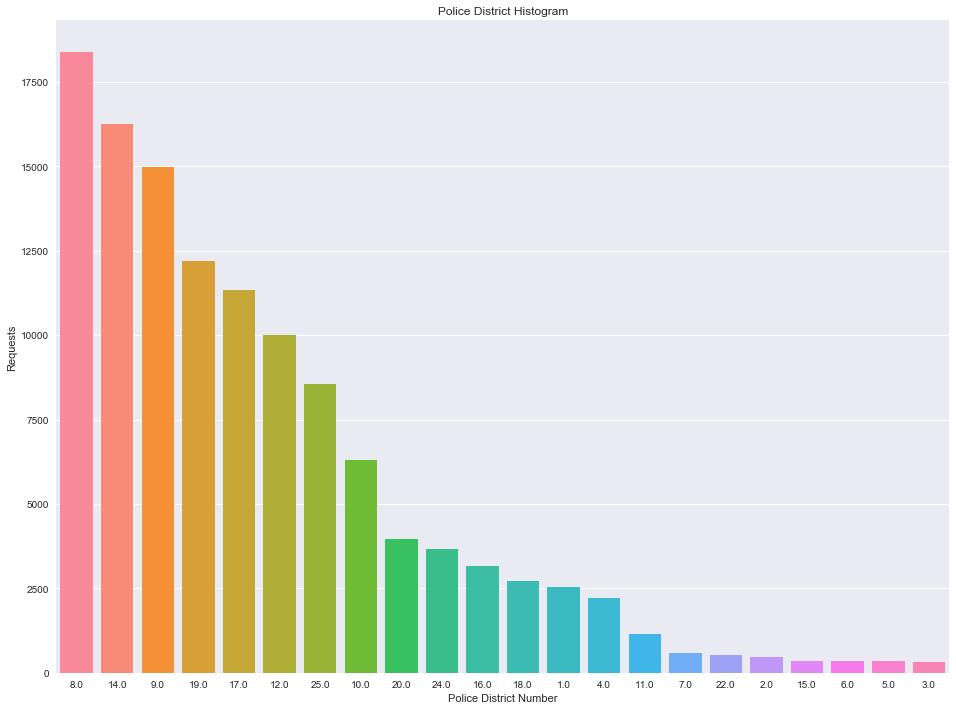

In [34]:
plt.figure(figsize=(16,12))
g=sns.countplot(x='Police District', saturation=1, data=graffiti, order=hist_police.index)
plt.title("Police District Histogram")
plt.xlabel("Police District Number")
plt.ylabel("Requests")
plt.show()

# Vacant and Abandoned Buildings Analysis

In [35]:
buildings = pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")

In [36]:
buildings.shape

(4472, 23)

We will remove service request tpe, service request number, Address Street Number, Address street direction, address street name, address street suffix, X co-ord, y co-ord, latitude, longitude and location.

In [37]:
buildings.drop('SERVICE REQUEST TYPE', axis=1, inplace=True)
buildings.drop("SERVICE REQUEST NUMBER", axis=1, inplace=True)
buildings.drop("ADDRESS STREET NUMBER", axis=1, inplace=True)
buildings.drop("ADDRESS STREET DIRECTION", axis=1, inplace=True)
buildings.drop("ADDRESS STREET NAME", axis=1, inplace=True)
buildings.drop("ADDRESS STREET SUFFIX", axis=1, inplace=True)
buildings.drop("X COORDINATE", axis=1, inplace=True)
buildings.drop("Y COORDINATE", axis=1, inplace=True)
buildings.drop("LATITUDE", axis=1, inplace=True)
buildings.drop("LONGITUDE", axis=1, inplace=True)
buildings.drop("Location", axis=1, inplace=True)

In [38]:
buildings.shape

(4472, 12)

In [39]:
sum(pd.isnull(buildings["IS THE BUILDING DANGEROUS OR HAZARDOUS?"]))

4472

Seems that this entire column is null, thus we will drop it.

In [40]:
buildings.drop("IS THE BUILDING DANGEROUS OR HAZARDOUS?", axis=1, inplace=True)

In [41]:
month_list = []

for i in buildings["DATE SERVICE REQUEST WAS RECEIVED"]:
    clean = datetime.strptime(i, "%m/%d/%Y")
    month_list.append(clean.month)

df_months = pd.DataFrame({"Month": month_list})
buildings = pd.concat([buildings,df_months], axis=1)

In [42]:
buildings = buildings.drop(buildings.index[buildings["ZIP CODE"] == 0.0])
buildings = buildings.drop(buildings.index[buildings["Police District"] == 0.0])
buildings = buildings.drop(buildings.index[buildings["Ward"] == 0.0])

In [43]:
buildings.head()

,DATE SERVICE REQUEST WAS RECEIVED,"LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).",IS BUILDING OPEN OR BOARDED?,"IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?",IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?,IS THE BUILDING VACANT DUE TO FIRE?,"ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)",ZIP CODE,Ward,Police District,Community Area,Month
0,01/02/2016,Front,Open,FRONT-SIDE AND REAR,Vacant,False,True,60621.0,16.0,7.0,68.0,1
1,01/03/2016,Front,Open,NaN,Vacant,False,False,60629.0,23.0,8.0,66.0,1
2,01/03/2016,Front,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,60636.0,16.0,7.0,67.0,1
3,01/03/2016,Front,Open,FRONT ENTRY,Vacant,False,False,60620.0,21.0,6.0,71.0,1
4,01/03/2016,Rear,Open,REAR,Vacant,False,False,60620.0,21.0,6.0,71.0,1


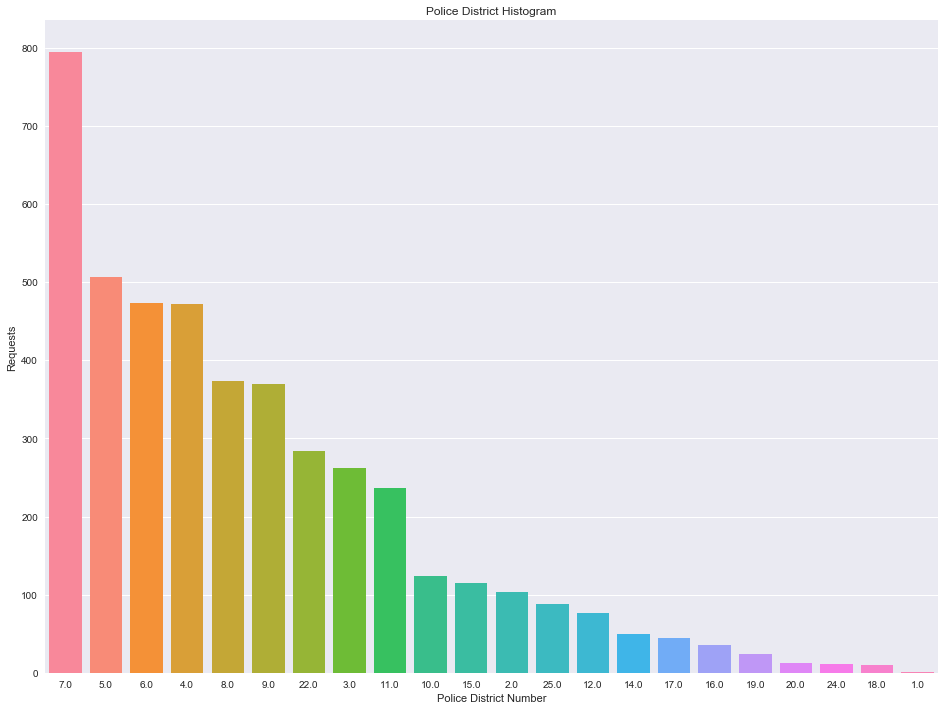

In [44]:
hist_police = buildings["Police District"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x='Police District', saturation=1, data=buildings, order=hist_police.index)
plt.title("Police District Histogram")
plt.xlabel("Police District Number")
plt.ylabel("Requests")
plt.show()

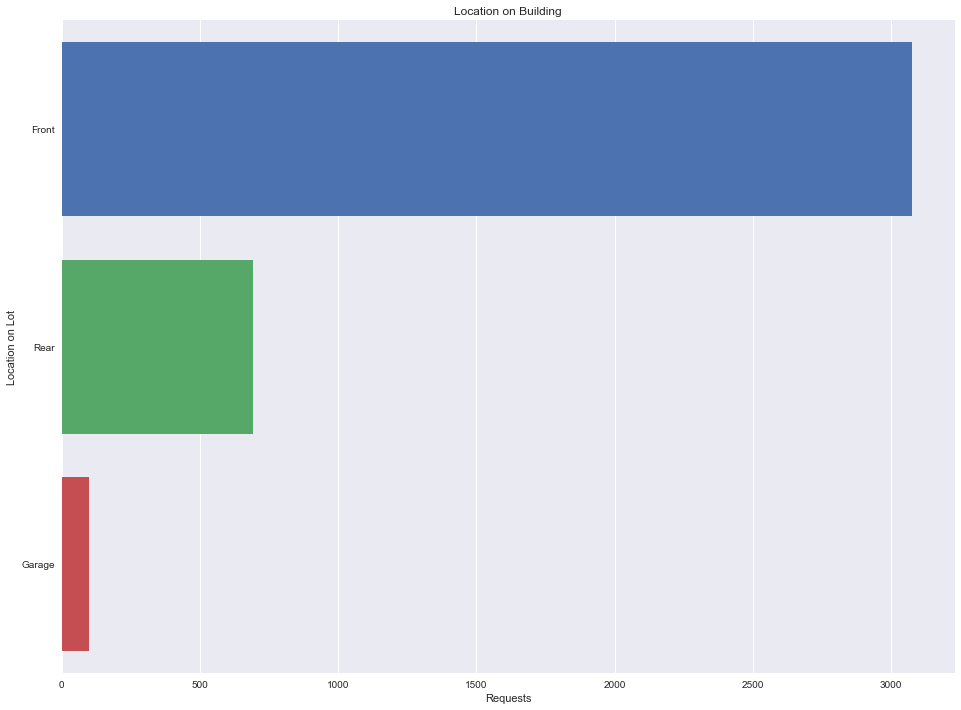

In [45]:
hist_location = buildings["LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD)."].value_counts()
plt.figure(figsize=(16,12))
g=sns.countplot(y='LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).', saturation=1, data=buildings, order=hist_location.index)
plt.title("Location on Building")
plt.xlabel("Requests")
plt.ylabel("Location on Lot")
plt.show()

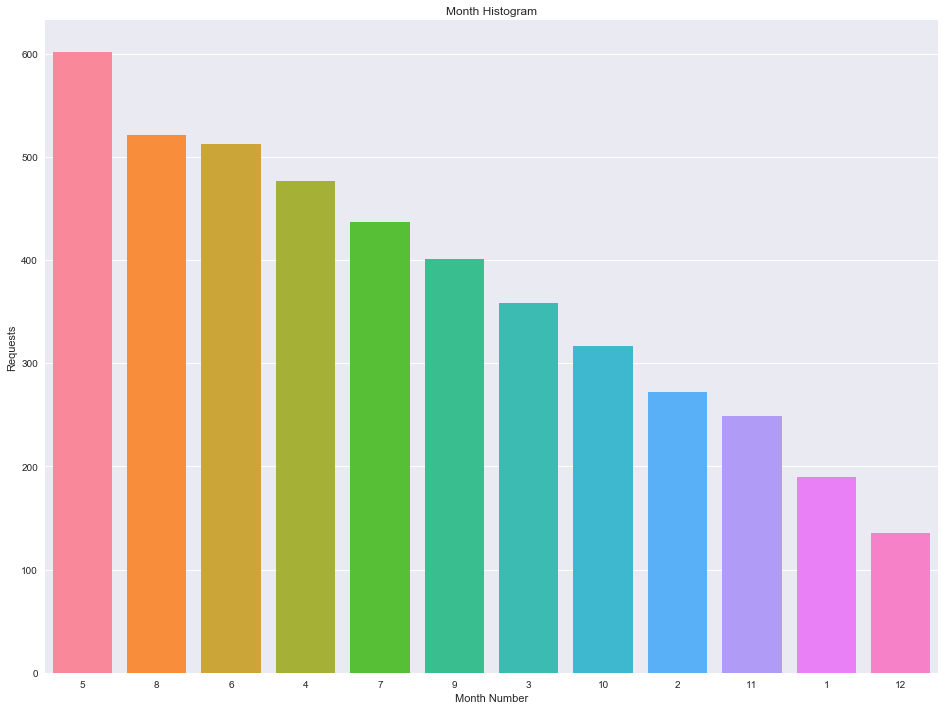

In [46]:
hist_month = buildings["Month"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x="Month", saturation=1, data=buildings, order=hist_month.index)
plt.title("Month Histogram")
plt.xlabel("Month Number")
plt.ylabel("Requests")
plt.show()

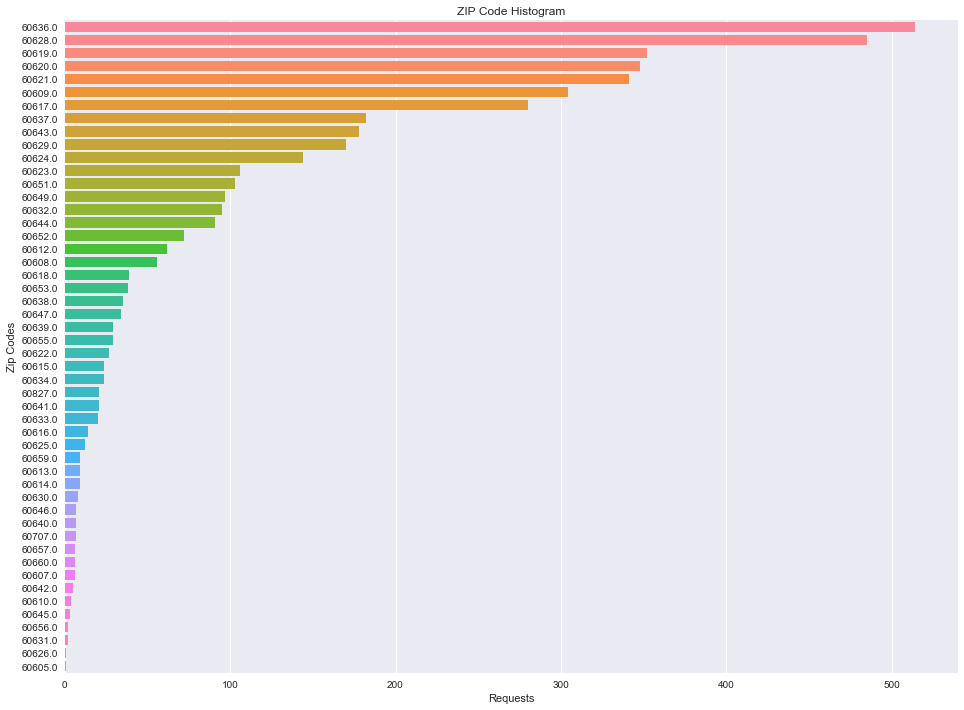

In [47]:
hist_zip = buildings["ZIP CODE"].value_counts()

plt.figure(figsize=(16,12))
g=sns.countplot(y='ZIP CODE', saturation=1, data=buildings, order=hist_zip.index)
plt.title("ZIP Code Histogram")
plt.xlabel("Requests")
plt.ylabel("Zip Codes")
plt.show()

# Potholes Analysis

In [48]:
potholes = pd.read_csv("311_Service_Requests_-_Pot_Holes_Reported.csv")

We will now remove some columns that will be of no use in analysis.

In [49]:
potholes.drop('SERVICE REQUEST NUMBER', axis=1, inplace=True)
potholes.drop("TYPE OF SERVICE REQUEST", axis=1, inplace=True)
potholes.drop("STREET ADDRESS", axis=1, inplace=True)
potholes.drop("X COORDINATE", axis=1, inplace=True)
potholes.drop("Y COORDINATE", axis=1, inplace=True)
potholes.drop("SSA", axis=1, inplace=True)
potholes.drop("LATITUDE", axis=1, inplace=True)
potholes.drop("LONGITUDE", axis=1, inplace=True)
potholes.drop("LOCATION", axis=1, inplace=True)
potholes = potholes.drop(potholes.index[potholes["ZIP"] == 0.0])
potholes = potholes.drop(potholes.index[potholes["Police District"] == 0.0])
potholes = potholes.drop(potholes.index[potholes["Ward"] == 0.0])

It does not make sense for certain rows to have no creation date. As such, we will drop these rows.

In [50]:
potholes = potholes.dropna(subset =["CREATION DATE"])
potholes = potholes.dropna(subset=["COMPLETION DATE"])

In [51]:
a = list(potholes['CREATION DATE'])
b = list(potholes["COMPLETION DATE"])

combined = list(zip(a,b))

days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)
# we are ensuring is is of type str as we have some nan which are of type float.

df_days = pd.DataFrame({"Response Time (Days)": days_list})
potholes = pd.concat([potholes,df_days], axis=1)

In [52]:
month_list = []

for i in potholes["CREATION DATE"]:
    if type(i) != float:
        clean = datetime.strptime(i, "%m/%d/%Y")
        month_list.append(clean.month)

df_months = pd.DataFrame({"Month": month_list})
potholes = pd.concat([potholes,df_months], axis=1)

In [53]:
potholes.head()

,CREATION DATE,STATUS,COMPLETION DATE,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,ZIP,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed - Dup,01/04/2016,NaN,NaN,NaN,60647.0,35.0,14.0,22.0,3.0,1.0
1,01/01/2016,Completed,01/04/2016,Final Outcome,Pothole Patched,6.0,60655.0,19.0,22.0,74.0,3.0,1.0
2,01/01/2016,Completed,01/04/2016,Final Outcome,Pothole Patched,2.0,60655.0,19.0,22.0,74.0,3.0,1.0
3,01/01/2016,Completed - Dup,01/05/2016,NaN,NaN,NaN,60639.0,31.0,25.0,19.0,4.0,1.0
4,01/01/2016,Completed - Dup,01/05/2016,NaN,NaN,NaN,60639.0,31.0,25.0,21.0,4.0,1.0


In [54]:
pd.DataFrame(potholes["MOST RECENT ACTION"].groupby(potholes["ZIP"]).value_counts())

MOST RECENT ACTION
ZIP     MOST RECENT ACTION                                                   
60601.0 Pothole Patched                                                   236
        No Potholes Found                                                  10
        CDOT Inspect Public Way Survey Transfer Outcome                     1
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        No Such Address Found                                               1
        Not Within CDOT Jurisdiction                                        1
60602.0 Pothole Patched                                                    51
        No Potholes Found                                                  11
        CDOT Alley Pot Hole Transfer Outcome                                1
60603.0 Pothole Patched                                                   100
        No Potholes Found                                                   4
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        WM Sewer Cave In Inspection Transfer Outcome                        1
60604.0 Pothole Patched                                                    89
        No Potholes Found                                                   8
        No Such Address Found                                               3
        Completed Upon Arrival                                              1
60605.0 Pothole Patched                                                   247
        No Potholes Found                                                  23
        Completed Upon Arrival                                             10
        WM Sewer Cave In Inspection Transfer Outcome                        3
        CDOT Alley Pot Hole Transfer Outcome                                1
        CDOT Pavement Cave-In Survey Transfer Outcome                       1
        No Such Address Found                                               1
60606.0 Pothole Patched                                                    95
        No Potholes Found                                                  12
        Completed Upon Arrival                                              1
60607.0 Pothole Patched                                                   422
        No Potholes Found                                                  28
        Completed Upon Arrival                                             12
...                                                                       ...
60660.0 Street Resurfaced                                                  12
        CDOT Alley Pot Hole Transfer Outcome                               10
        No Action - See Remarks in Description                              5
        CDOT Inspect Public Way Survey Transfer Outcome                     4
        CDOT Pavement Cave-In Survey Transfer Outcome                       4
        WM Sewer Cave In Inspection Transfer Outcome                        4
        Follow-on Pot Hole in Street Created                                2
60661.0 Pothole Patched                                                   115
        No Potholes Found                                                   7
        Completed Upon Arrival                                              3
        Follow-on Pot Hole in Street Created                                1
        Not Within CDOT Jurisdiction                                        1
        Street Resurfaced                                                   1
        WM Sewer Cave In Inspection Transfer Outcome                        1
60666.0 No Such Address Found                                               1
60707.0 Pothole Patched                                                   231
        No Potholes Found                                                  26
        Completed Upon Arrival                                             17
        Street Resurfaced                                                  10
   

In [55]:
potholes['Response Time (Days)'].groupby(potholes['ZIP']).describe().unstack()

,count,mean,std,min,25%,50%,75%,max
ZIP,,,,,,,,
60601.0,259.0,25.671815,43.884411,0.0,0.5,4.0,30.50,228.0
60602.0,63.0,16.984127,32.267777,0.0,1.0,2.0,8.00,155.0
60603.0,123.0,19.902439,28.769125,0.0,1.0,6.0,29.00,155.0
60604.0,115.0,16.408696,22.651012,0.0,1.0,6.0,20.00,101.0
60605.0,334.0,22.754491,33.170588,0.0,1.0,9.0,33.00,165.0
60606.0,108.0,19.305556,35.699017,0.0,0.0,2.0,17.00,165.0
60607.0,503.0,15.868787,27.441693,0.0,1.0,4.0,15.50,203.0
60608.0,1310.0,21.590076,34.438848,0.0,1.0,6.0,29.00,245.0
60609.0,1010.0,17.999010,30.945122,0.0,1.0,5.0,20.00,256.0


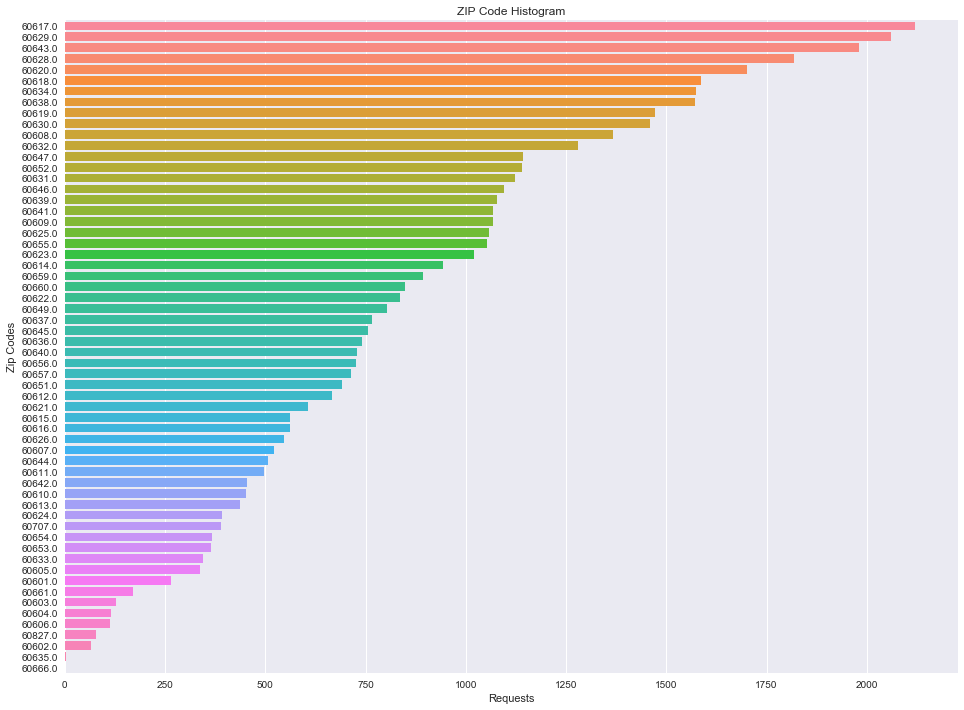

In [56]:
hist_zip = potholes["ZIP"].value_counts()

plt.figure(figsize=(16,12))
g=sns.countplot(y='ZIP', saturation=1, data=potholes, order=hist_zip.index)
plt.title("ZIP Code Histogram")
plt.xlabel("Requests")
plt.ylabel("Zip Codes")
plt.show()

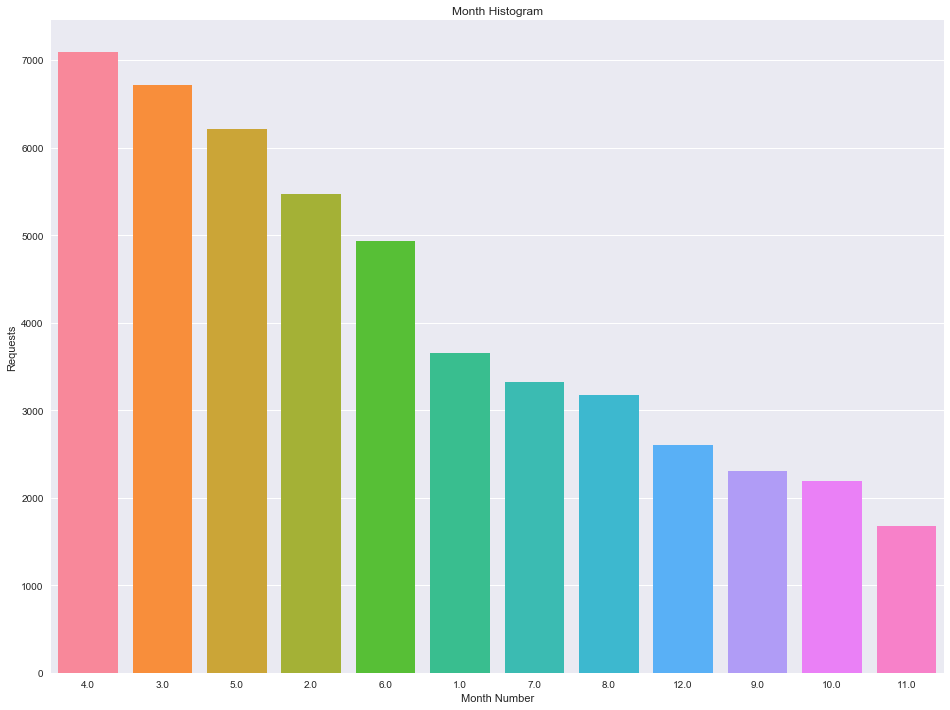

In [57]:
hist_month = potholes["Month"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x="Month", saturation=1, data=potholes, order=hist_month.index)
plt.title("Month Histogram")
plt.xlabel("Month Number")
plt.ylabel("Requests")
plt.show()

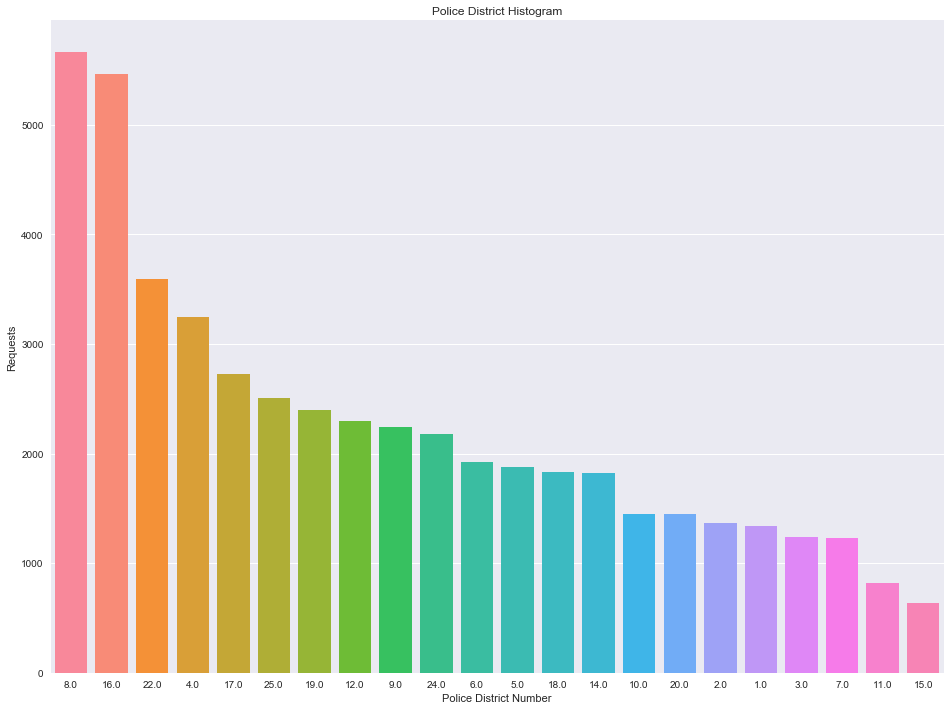

In [58]:
hist_police = potholes["Police District"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x='Police District', saturation=1, data=potholes, order=hist_police.index)
plt.title("Police District Histogram")
plt.xlabel("Police District Number")
plt.ylabel("Requests")
plt.show()

# Sanitation Section

In [59]:
sanitation = pd.read_csv("311_Service_Requests_-_Sanitation_Code_Complaints.csv")

We will now delete some columns that will be of no use in analysis.

In [60]:
sanitation.drop("Service Request Number", axis=1, inplace=True)
sanitation.drop("Type of Service Request", axis=1, inplace=True)
sanitation.drop("X Coordinate", axis=1, inplace=True)
sanitation.drop("Y Coordinate", axis=1, inplace=True)
sanitation.drop("Latitude", axis=1, inplace=True)
sanitation.drop("Longitude", axis=1, inplace=True)
sanitation.drop("Location", axis=1, inplace=True)
sanitation.drop("Street Address", axis=1, inplace=True)
sanitation = sanitation.drop(sanitation.index[sanitation["ZIP Code"] == 0.0])
sanitation = sanitation.drop(sanitation.index[sanitation["Police District"] == 0.0])
sanitation = sanitation.drop(sanitation.index[sanitation["Ward"] == 0.0])

In [61]:
a = list(sanitation['Creation Date'])
b = list(sanitation["Completion Date"])

combined = list(zip(a,b))

days_list = []

for i in combined:
    start, end = i
    if type(start) and type(end) == str:
        days = days_between(start, end)
        days_list.append(days)
# we are ensuring is is of type str as we have some nan which are of type float.

df_days = pd.DataFrame({"Response Time (Days)": days_list})
sanitation = pd.concat([sanitation,df_days], axis=1)

In [63]:
month_list = []

for i in sanitation["Creation Date"]:
    if type(i) != float:
        clean = datetime.strptime(i, "%m/%d/%Y")
        month_list.append(clean.month)

df_months = pd.DataFrame({"Month": month_list})
sanitation = pd.concat([sanitation,df_months], axis=1)

In [64]:
sanitation.head()

,Creation Date,Status,Completion Date,What is the Nature of this Code Violation?,ZIP Code,Ward,Police District,Community Area,Response Time (Days),Month
0,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60612.0,27,12,27,3.0,1
1,01/01/2016,Completed,01/04/2016,Garbage in yard,60619.0,6,6,44,3.0,1
2,01/01/2016,Completed,01/04/2016,Construction Site Cleanliness/Fence,60607.0,25,1,32,3.0,1
3,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60645.0,50,24,2,3.0,1
4,01/01/2016,Completed,01/04/2016,Dumpster not being emptied,60657.0,32,19,5,3.0,1


In [65]:
pd.DataFrame(sanitation["What is the Nature of this Code Violation?"].groupby(sanitation["ZIP Code"]).value_counts())

What is the Nature of this Code Violation?
ZIP Code What is the Nature of this Code Violation?                                            
60601.0  Other                                                                               23
         Garbage in alley                                                                     8
         Dumpster not being emptied                                                           6
         Construction Site Cleanliness/Fence                                                  1
         Garbage in yard                                                                      1
60602.0  Garbage in alley                                                                     9
         Other                                                                                5
         Construction Site Cleanliness/Fence                                                  1
         Dumpster not being emptied                                                           1
60603.0  Garbage in alley                                                                     5
         Other                                                                                3
60604.0  Dumpster not being emptied                                                           1
         Garbage in alley                                                                     1
         Other                                                                                1
         Overflowing carts                                                                    1
60605.0  Other                                                                               32
         Garbage in alley                                                                    12
         Garbage in yard                                                                      9
         Dog feces in yard                                                                    6
         Dumpster not being emptied                                                           5
         Construction Site Cleanliness/Fence                                                  4
         Standing water                                                                       2
         Overflowing carts                                                                    1
60606.0  Other                                                                                6
         Garbage in alley                                                                     5
         Dumpster not being emptied                                                           4
         Overflowing carts                                                                    3
         Construction Site Cleanliness/Fence                                                  1
         Garbage in yard                                                                      1
         Standing water                                                                       1
...                                                                                         ...
60659.0  Garbage in alley                                                                    48
         Overflowing carts                                                                   38
         Dumpster not being emptied                                                          26
         Dog feces in yard                                                                    5
         Construction Site Cleanliness/Fence                                                  3
60660.0  Other                                                                               38
         Overflowing carts                                                                   23
         Garbage in alley                                                                    19
         Garbage in yard                                                                     18
         Dumpster not

In [66]:
sanitation['Response Time (Days)'].groupby(sanitation['ZIP Code']).describe().unstack()

,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,39.0,7.897436,7.454405,1.0,2.50,5.0,11.50,30.0
60602.0,19.0,5.315789,11.235127,1.0,1.00,2.0,4.50,51.0
60603.0,9.0,11.000000,12.549900,1.0,4.00,9.0,11.00,42.0
60604.0,4.0,5.000000,6.055301,1.0,1.75,2.5,5.75,14.0
60605.0,71.0,11.253521,12.418556,0.0,3.00,6.0,15.50,54.0
60606.0,23.0,9.217391,9.100232,0.0,3.00,5.0,11.00,32.0
60607.0,132.0,12.946970,17.336065,0.0,2.00,6.5,21.00,147.0
60608.0,560.0,8.523214,15.259104,0.0,2.00,3.0,8.25,165.0
60609.0,553.0,11.584087,16.166611,0.0,2.00,5.0,17.00,144.0


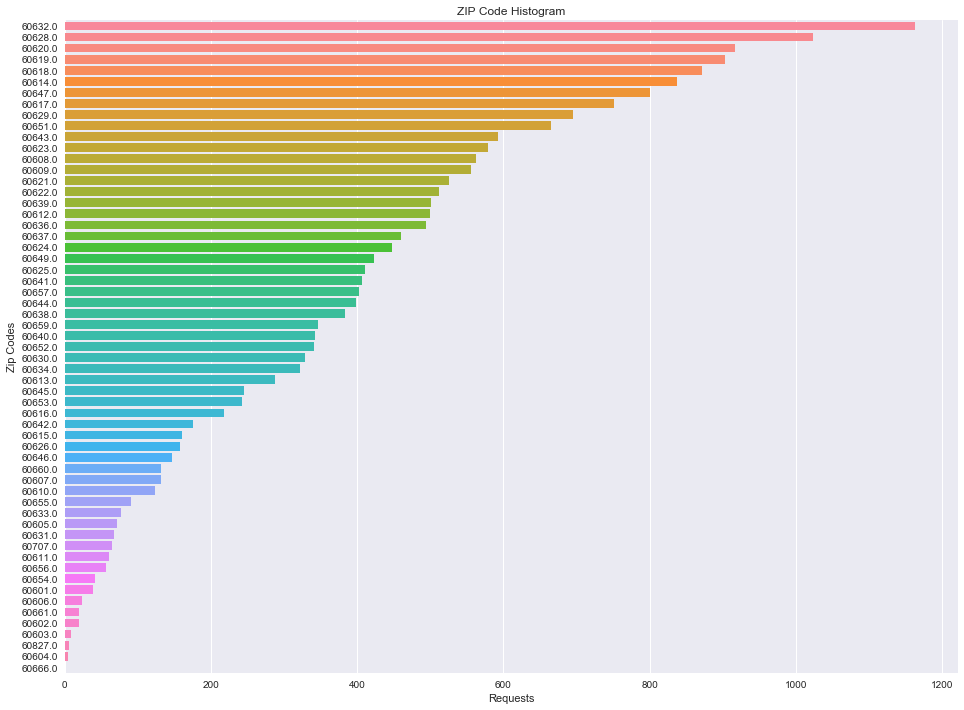

In [67]:
hist_zip = sanitation["ZIP Code"].value_counts()

plt.figure(figsize=(16,12))
g=sns.countplot(y='ZIP Code', saturation=1, data=sanitation, order=hist_zip.index)
plt.title("ZIP Code Histogram")
plt.xlabel("Requests")
plt.ylabel("Zip Codes")
plt.show()

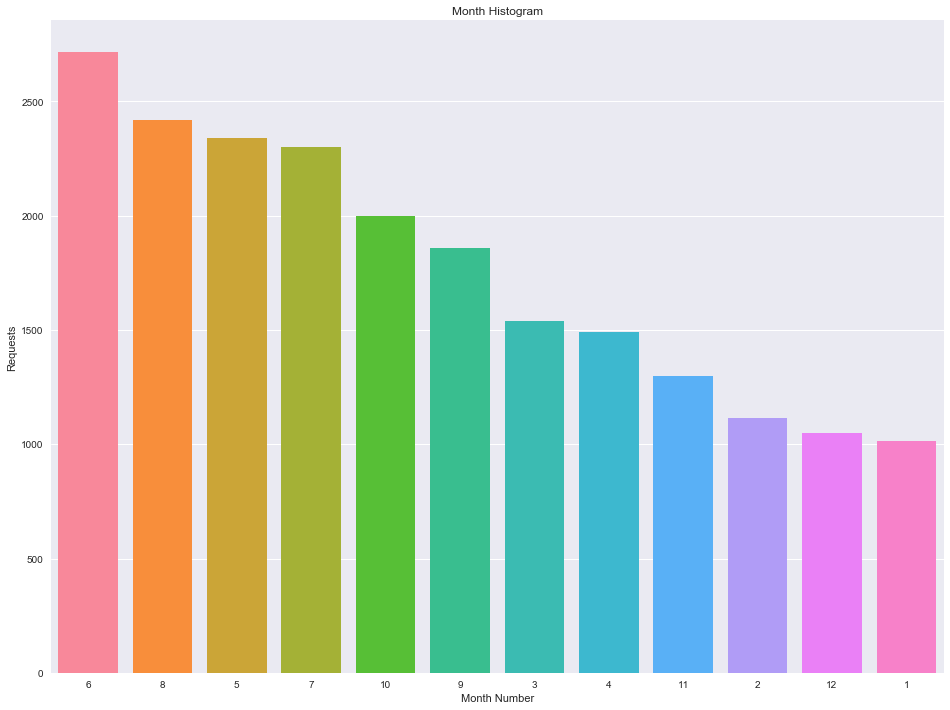

In [68]:
hist_month = sanitation["Month"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x="Month", saturation=1, data=sanitation, order=hist_month.index)
plt.title("Month Histogram")
plt.xlabel("Month Number")
plt.ylabel("Requests")
plt.show()

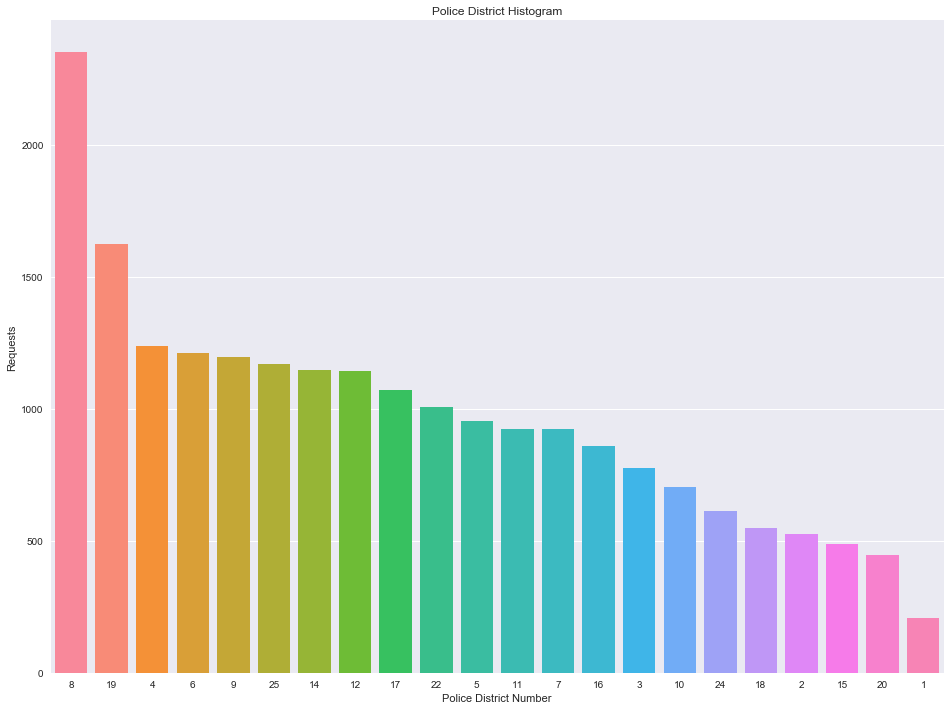

In [69]:
hist_police = sanitation["Police District"].value_counts(sort=True)
plt.figure(figsize=(16,12))
g=sns.countplot(x='Police District', saturation=1, data=sanitation, order=hist_police.index)
plt.title("Police District Histogram")
plt.xlabel("Police District Number")
plt.ylabel("Requests")
plt.show()

# Conclusion

This concludes our analysis of the data set. Here is some interesting things we found via the plots and tables.

### For Graffiti:

- The month of August had the highest number of requests (~ 12,000)
- 60632 was the zip code with the most number of requests (~ 14,000)
- The 8th Police District experiences the highest number of requests ~ 18,750)

### For Buildings:

- The month of May had the highest number of requests (~ 600)
- 60636 was the zip code with the most number of requests (~ 525)
- The 7th Police District experiences the highest number of requests ~ 800)

### For Potholes:

- The month of April had the highest number of requests (~ 7000)
- 60617 was the zip code with the most number of requests (~ 2500)
- The 8th Police District experiences the highest number of requests ~ 6,000) 

### Sanitation

- The month of June had the highest number of requests (~ 2,750)
- 60632 was the zip code with the most number of requests (~ 12,000)
- The 8th Police District experiences the highest number of requests ~ 2,750)

## Interesting:

There seems to be some clustering around the 8th and 7th Police Disctrict in addition to the 60632 Zip code across all databases. Perhaps these are the areas that are most neglected.